In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [34]:
df = pd.read_csv('/home/dasxgo/dev/analytics-hub/data/Salary Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


### **Data preprocessing Part 1**

In [9]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [10]:
df.shape

(375, 6)

In [11]:
# Check the nunmber of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

Gender               2
Education Level      3
Job Title          174
dtype: int64

In [12]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

### **Exploratory Data Analysis**

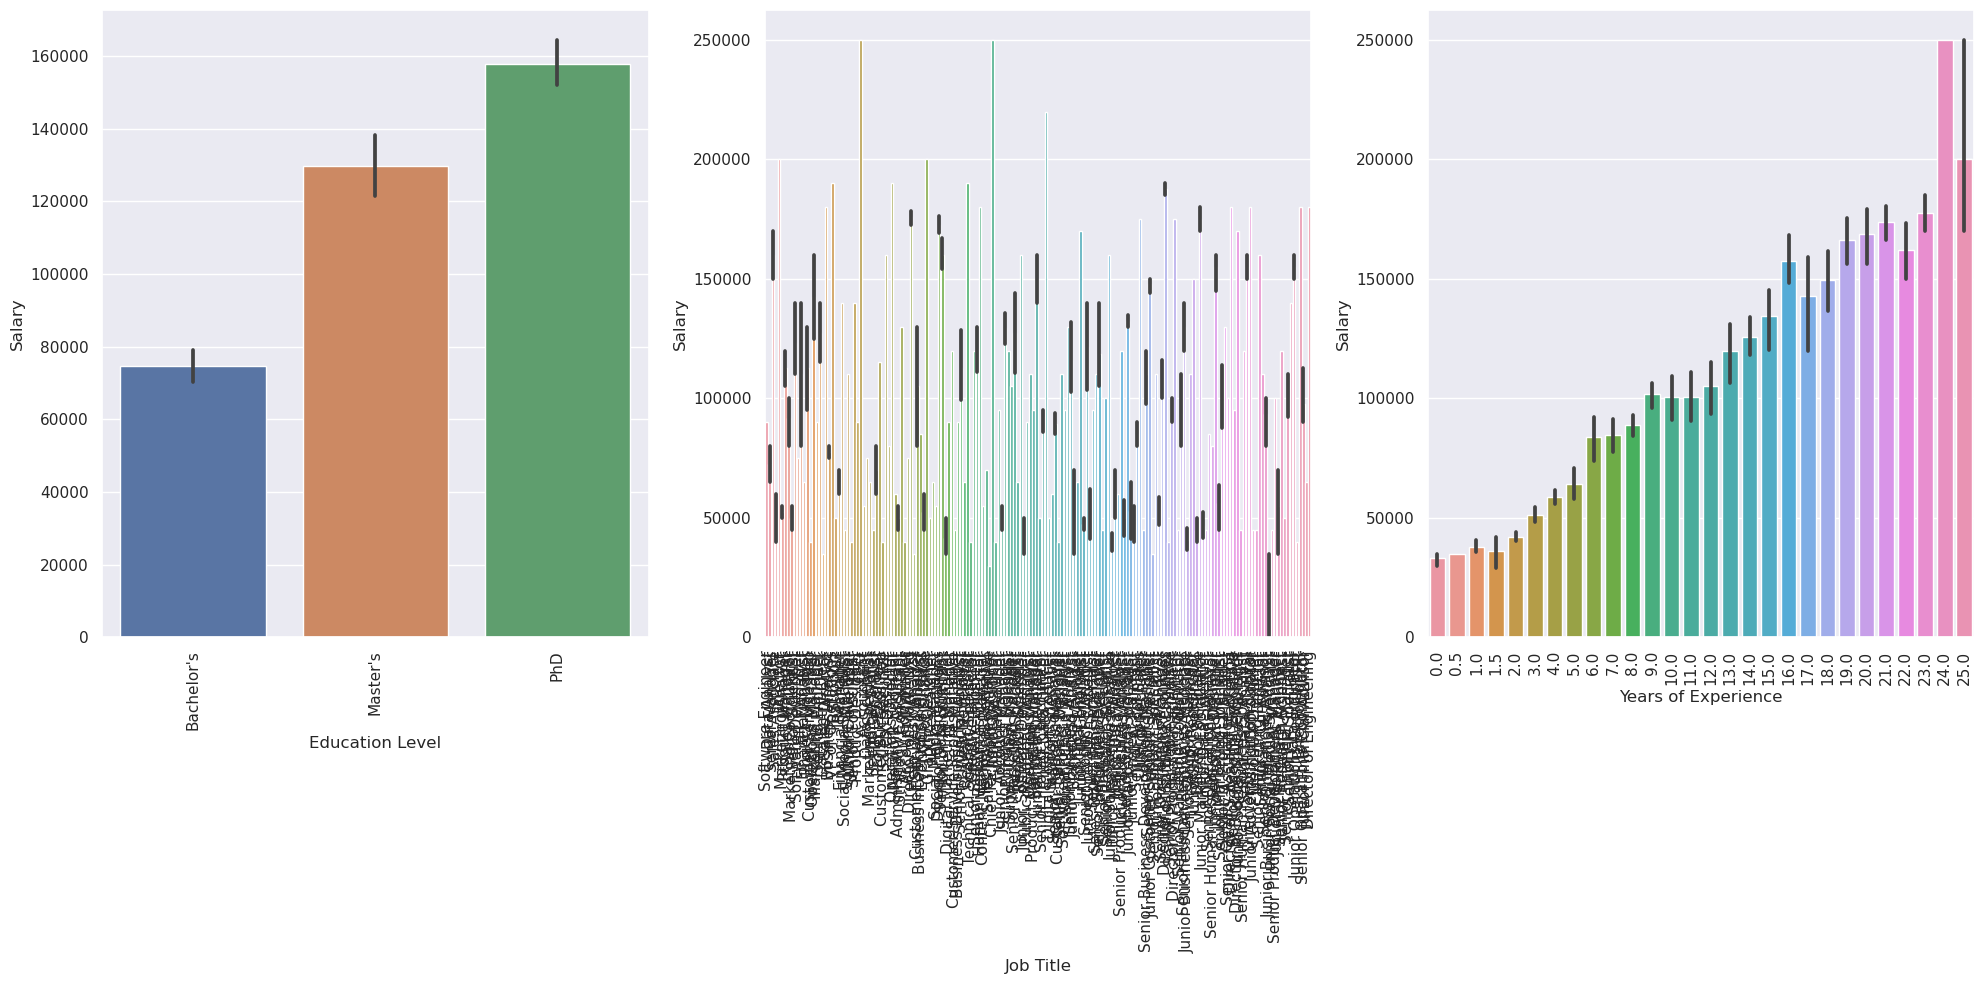

In [13]:
# list cattegorical variables to plot
cat_vars = ['Education Level', 'Job Title', 'Years of Experience']

# Create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
axs = axs.ravel()

# Create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Salary', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# ajusting spacing between subplots
fig.tight_layout()

# show plot
plt.show()



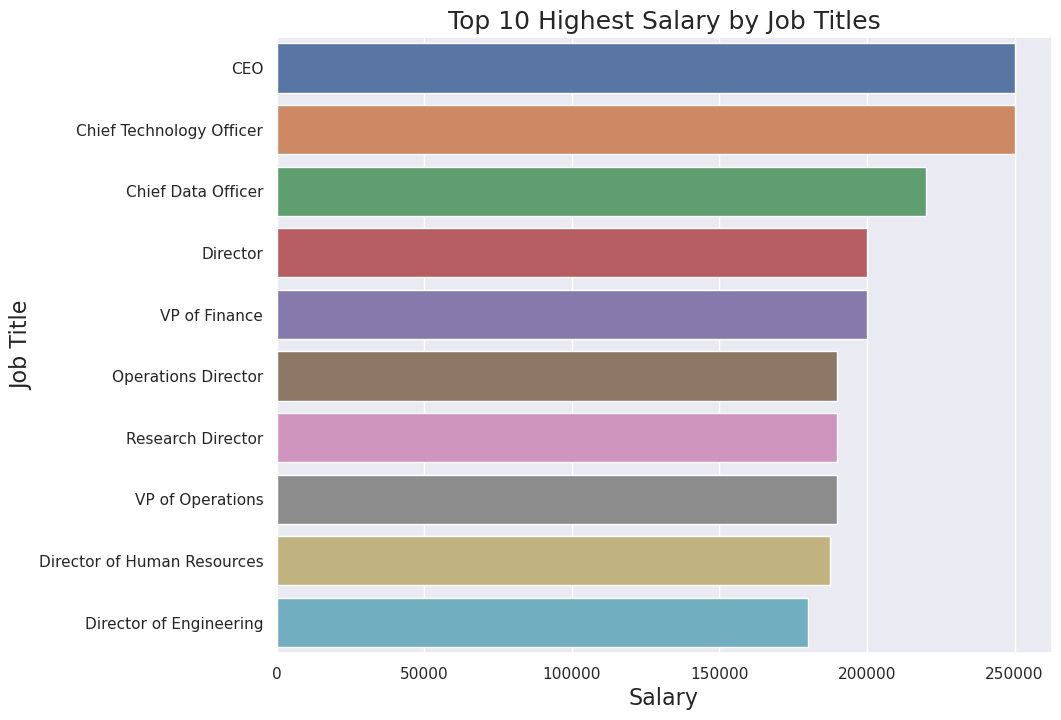

In [14]:
dfjob = df.groupby('Job Title', as_index=False)['Salary'].mean()
dfjob2 = dfjob.nlargest(10,'Salary')

# Show bar plot
plt.figure(figsize=(10,8))
sns.barplot(data=dfjob2, x='Salary', y='Job Title')
plt.title('Top 10 Highest Salary by Job Titles', fontsize=18)
plt.xlabel('Salary', fontsize=16)
plt.ylabel('Job Title', fontsize=16)
plt.show()



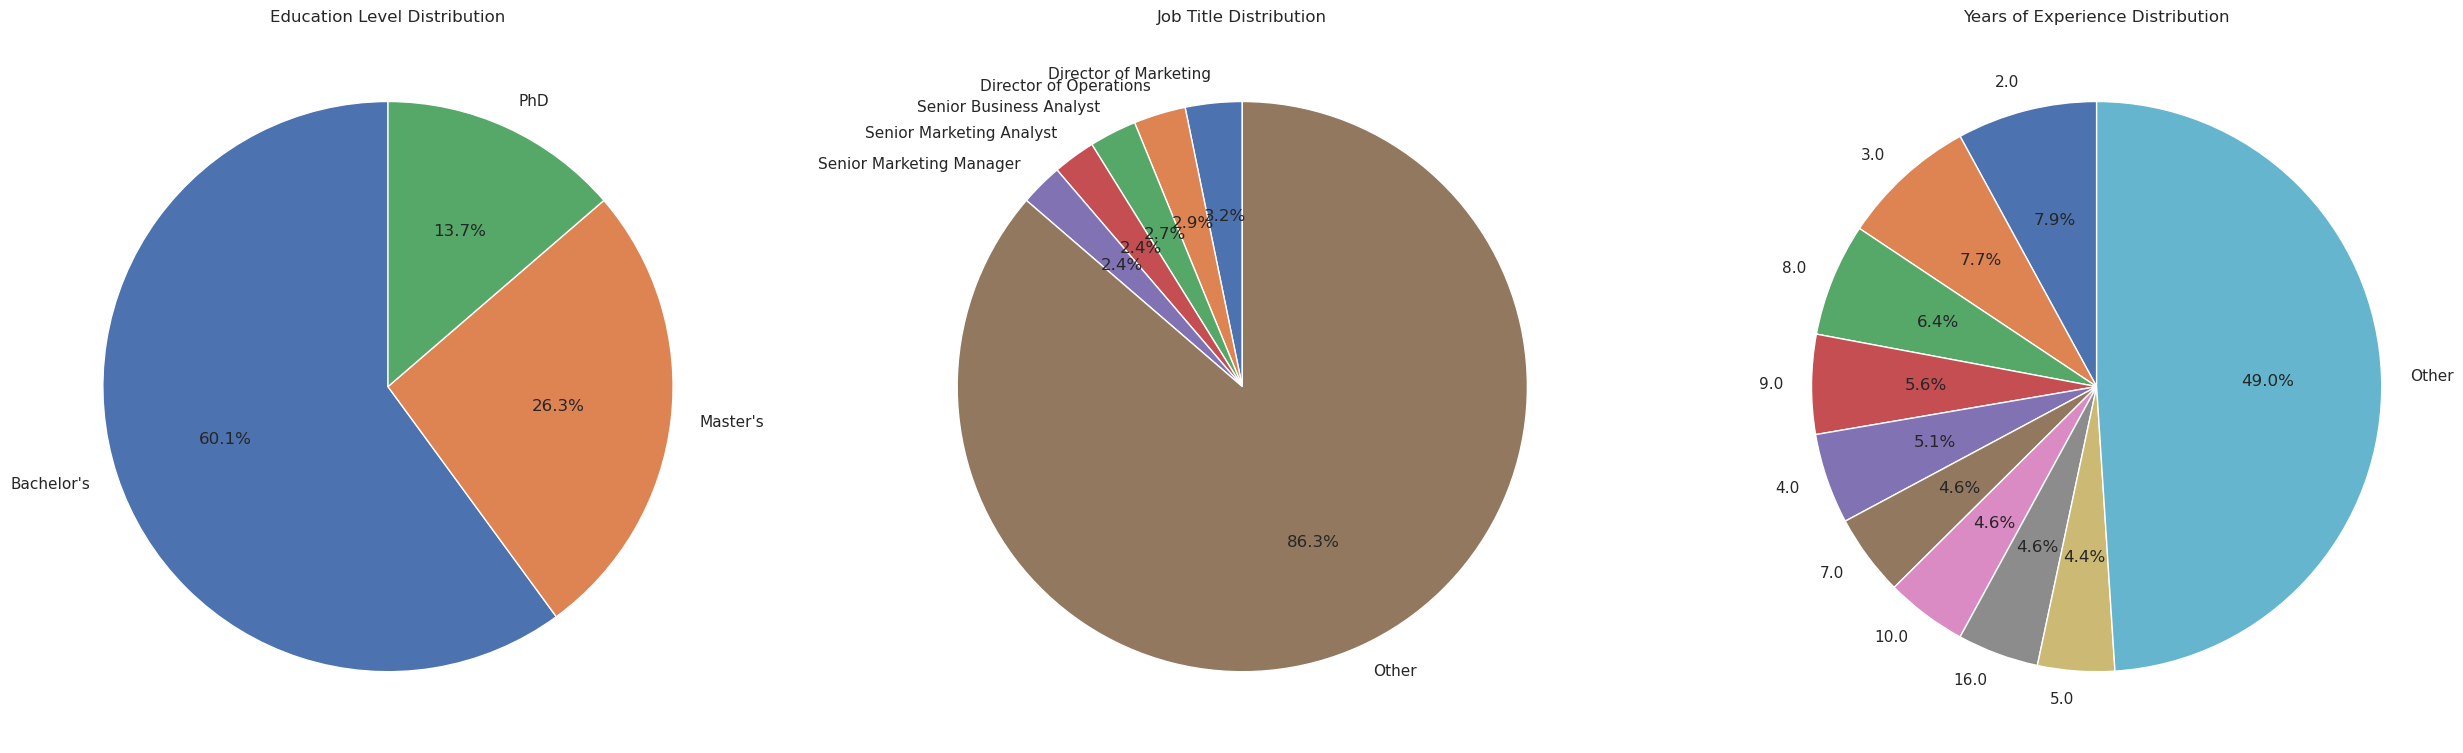

In [15]:
# Specify the maximum number of categories to show individually
max_categories = 5

cat_vars = ['Education Level', 'Job Title', 'Years of Experience']

# Create figure and axes
fig, axs = plt.subplots(nrows=1, ncols=len(cat_vars), figsize=(25, 10))

# Create a pie chart for each categorical variable
for var, ax in zip(cat_vars, axs):
    # Count the number of occurrences for each category
    cat_counts = df[var].value_counts()
    # Group categories beyond the top max_categories as 'Other'
    if len(cat_counts) > max_categories:
        cat_counts_top = cat_counts[:max_categories]
        cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
        cat_counts = pd.concat([cat_counts_top, cat_counts_other])  # Concatenate Series
    # Create pie chart
    ax.pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
    # Set a title for each subplot
    ax.set_title(f'{var} Distribution')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

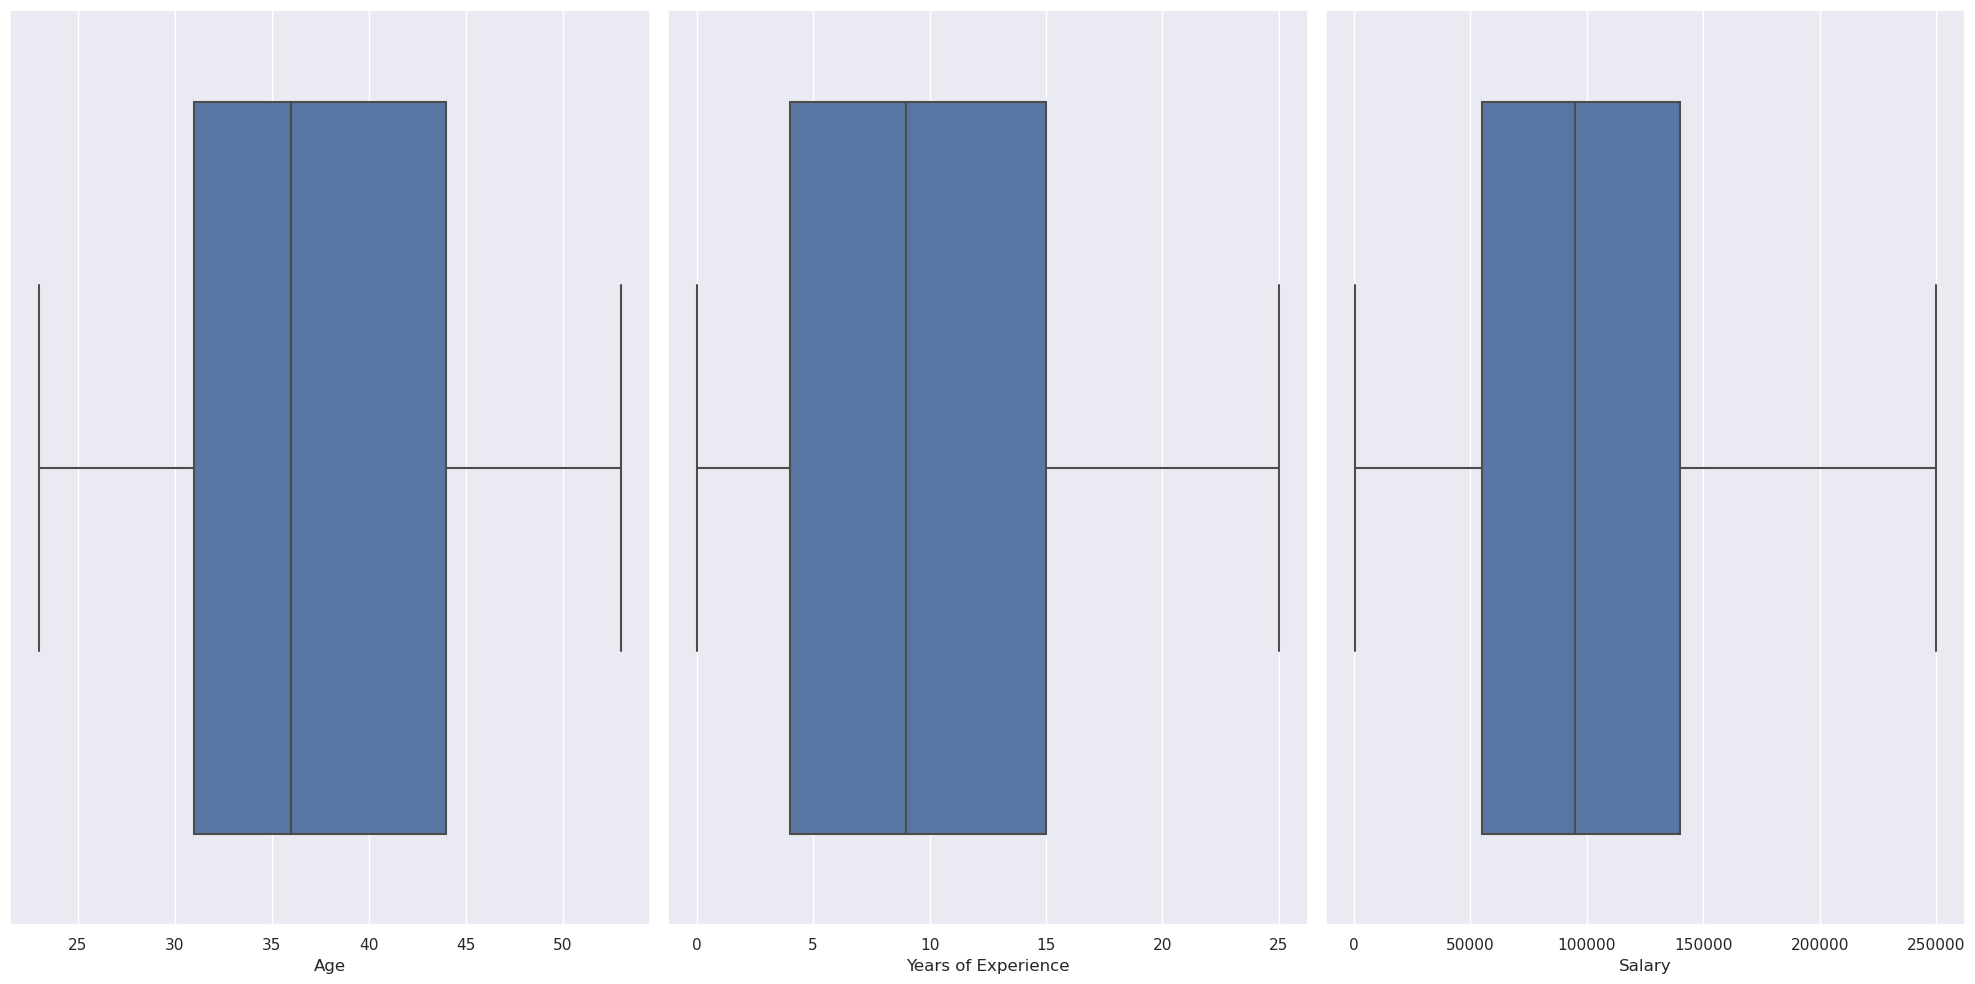

In [16]:
num_vars = ['Age', 'Years of Experience', 'Salary']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])
fig.tight_layout()

plt.show()

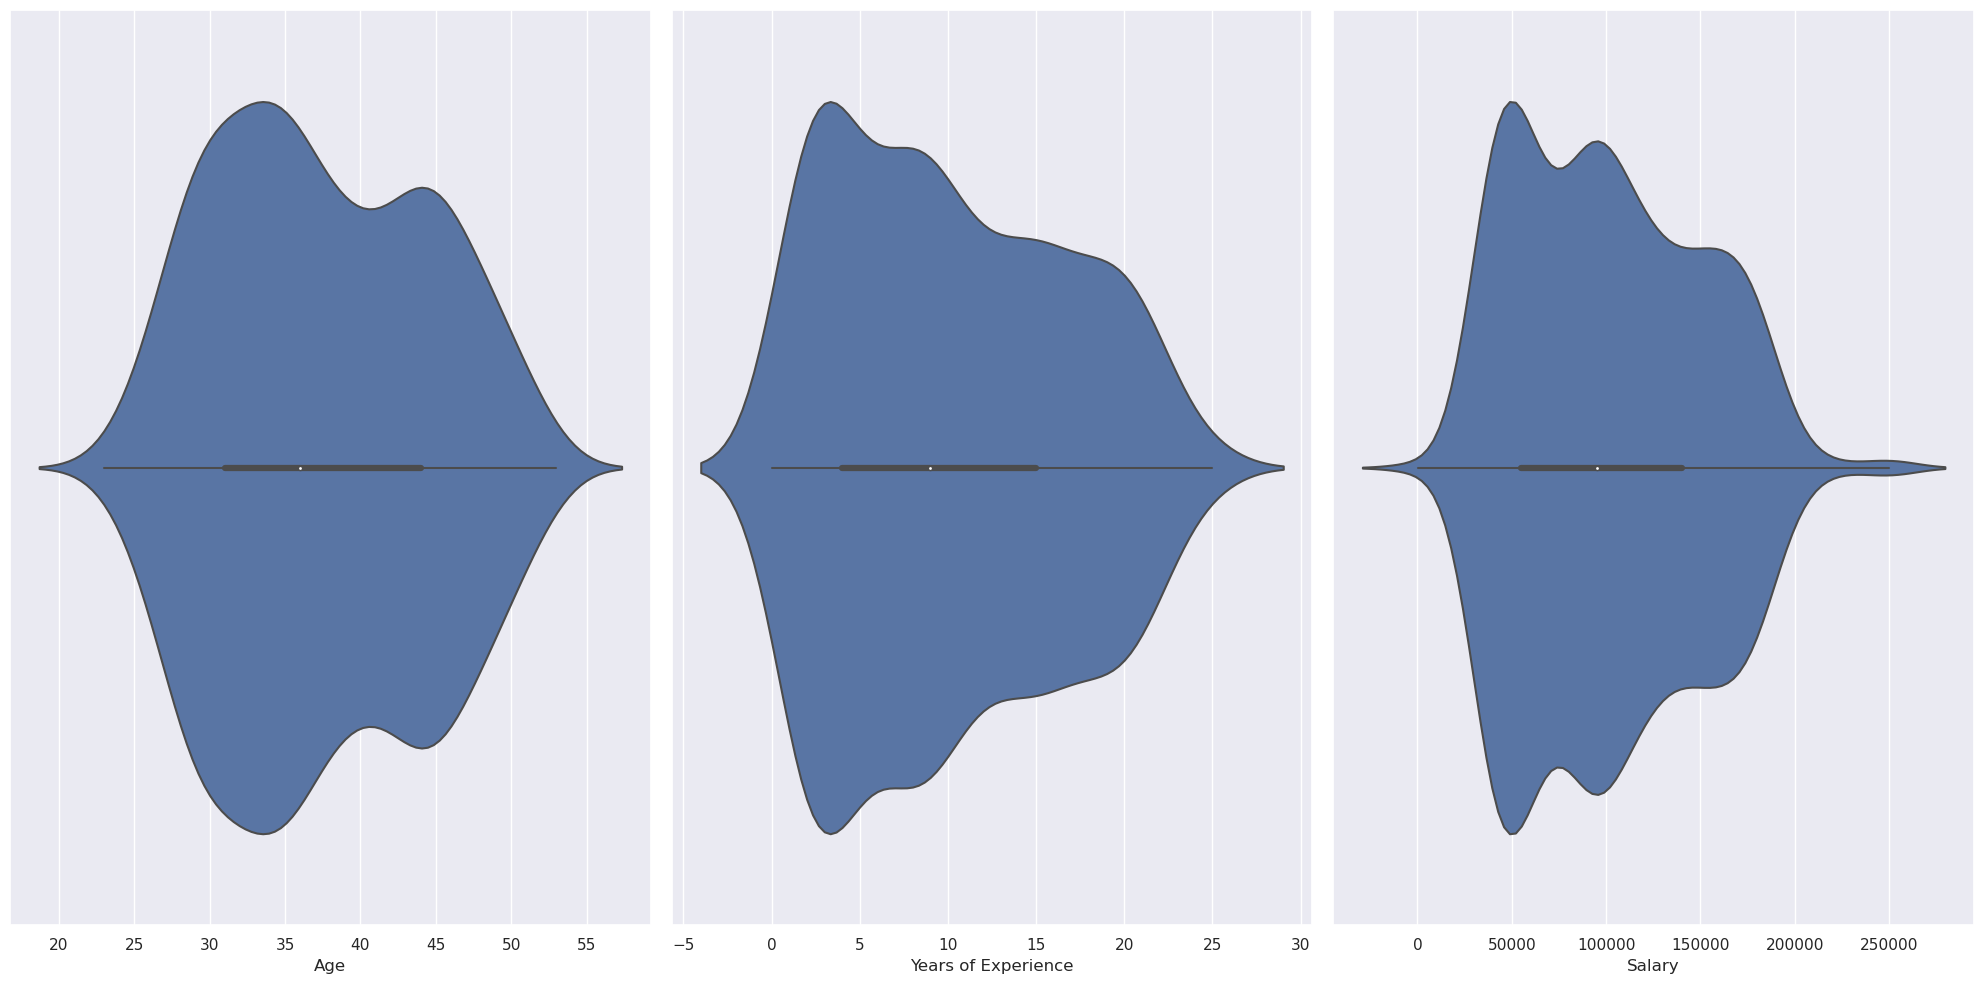

In [17]:
num_vars = ['Age', 'Years of Experience', 'Salary']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])
fig.tight_layout()

plt.show()

### **Data Preprocessing Part 2**

In [18]:
# Check missing value
check_missing = df.isnull().sum()*100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Age                    0.533333
Gender                 0.533333
Education Level        0.533333
Job Title              0.533333
Years of Experience    0.533333
Salary                 0.533333
dtype: float64

In [19]:
df.shape

(375, 6)

In [20]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [21]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [22]:
df.dropna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [23]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [24]:
missing_counts = df.isnull().sum()
df = df.dropna()

In [25]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [26]:
# Check missing value
check_missing = df.isnull().sum()*100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=True)

Series([], dtype: float64)

In [27]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [28]:
df.shape

(373, 6)

In [29]:
# Drop columns that have alot of unique value gender its irrelevant.
df.drop(columns=['Gender', 'Job Title'], inplace = True)
df.head()


,Age,Education Level,Years of Experience,Salary
0,32.0,Bachelor's,5.0,90000.0
1,28.0,Master's,3.0,65000.0
2,45.0,PhD,15.0,150000.0
3,36.0,Bachelor's,7.0,60000.0
4,52.0,Master's,20.0,200000.0


### **Label Encoding for each Object datatype**

In [30]:
for col in df.select_dtypes(include=['object']).columns:
    # Print the column name and the unique values
    print(f'{col}: {df[col].unique()}')

Education Level: ["Bachelor's" "Master's" 'PhD']


In [31]:
from sklearn import preprocessing

# Loop over each column in ttthe Dataframe where dtype is object
for col in df.select_dtypes(include=['object']).columns:
    # Initialize a labelencoder object
    label_encoder = preprocessing.LabelEncoder()
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    # Print the column name and the unique encoded values
    print(f'{col}: {df[col].unique()}')



Education Level: [0 1 2]


### **Correlation HeatMap**

<Axes: >

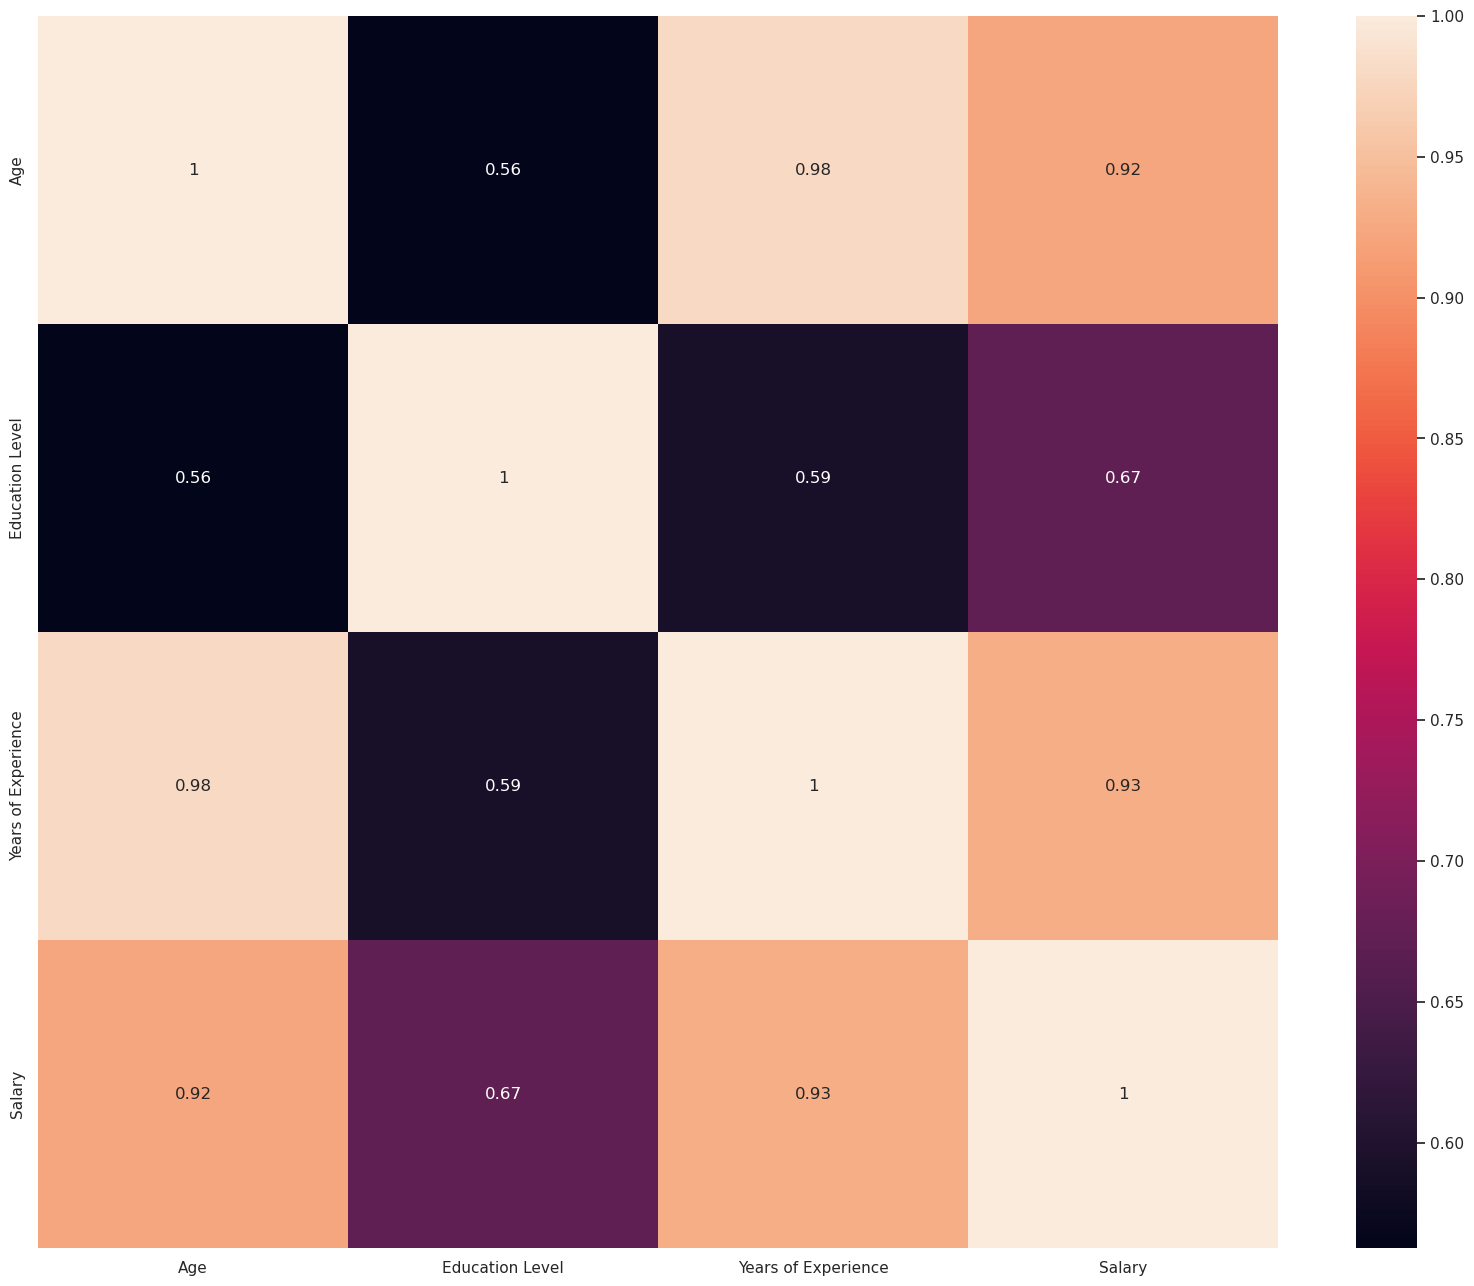

In [32]:
# Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

### **Train test split**